<h1> Análise de Empregabilidade - CAGED </h1>
<h2>Estudo sobre consequências da pandemia no mercado de trabalho</h2>
<h4>Fonte: CAGED </h4>
<h3> Gustavo dos Santos Moura RA: 1460481911026 </h3>
<h3> José Henrique Cz. dos Santos RA: 1460481911042</h3>
<h3> Marcos Paulo Simões Donizete RA: 1460481911054</h3>



In [1]:
import glob 
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

dic = pd.read_csv("./Base de Dados/legenda.txt",delimiter=';', encoding='utf-8')

<h4> Formatação dos dados do Caged </h4>

In [2]:
def arrumaDb(db,leg):
    listaNomesDb = []
    listaNomesLeg = []
    dic = {}
    listaCodFica= []
    for x in range(len(leg["codmunicípio"])):
        listaCodFica.append(leg["codmunicípio"][x])
    db = db.where((db["município"]).isin(listaCodFica)).dropna()
    db = db.drop(columns=['região','uf','subclasse','saldomovimentação','cbo2002ocupação','categoria','tipoestabelecimento','tipodedeficiência','indtrabintermitente','horascontratuais','tamestabjan','indicadoraprendiz','fonte','competência','indtrabparcial'])
    
    for name in leg.columns:
        listaNomesLeg.append(name)
    
    for name in db.columns:
        listaNomesDb.append(name)
    
    for k in range(0,len(leg.columns),2):
        dic = {}
        for i in range(len(leg)):
            if (leg.notna()[listaNomesLeg[k]][i]):
                dic[leg[listaNomesLeg[k]][i]]=leg[listaNomesLeg[k+1]][i]
        try:
            db[listaNomesLeg[k+1]]=db[listaNomesLeg[k+1]].map(dic)
        except:
            print(sys.exc_info()[0])
     
    return db

<h4> Função para pesquisar a quantidade dos dados </h4>

In [3]:
def pesquisaQuant(df,entrada,coluna):
    pesquisaFeita = ""
    kery = ""
    
    if(isinstance(coluna, list)):
        for q in range(len(coluna)):
            if(isinstance(entrada, list)):
                kery+= f'{coluna[q]}=="{entrada[q]}"'
            else:
                kery+= f'{coluna[q]}=="{entrada}"' 
            if (coluna[q]!=coluna[-1]):
                kery+=" and "
    else:
        if(isinstance(entrada, list)):
            for q in range(len(entrada)):
                kery+= f'{coluna}=="{entrada[q]}"'
                if (entrada[q]!=entrada[-1]):
                    kery+=" and "
        else:
            kery+= f'{coluna}=="{entrada}"' 

    quantidade = df.query(kery)[coluna].count()
    try:
        quantidade = quantidade[0]
    except:
        return quantidade
    return quantidade

<h4> Função para pesquisar dados mais simples </h4>

In [4]:
def pesquisa(df,kery):
    quantidade = df.query(kery).count()
    try:
        quantidade = quantidade[0]
    except:
        return quantidade
    return quantidade

<h4> Leitura de todos os dados do Caged </h4>

In [5]:
jan2020 = pd.read_csv("./Base de Dados/CAGEDMOV202001.txt",delimiter=';', encoding='utf-8')
jan2020 = arrumaDb(jan2020, dic)
print("jan2020 carregado")
fev2020 = pd.read_csv("./Base de Dados/CAGEDMOV202002.txt",delimiter=';', encoding='utf-8')
fev2020 = arrumaDb(fev2020, dic)
print("fev2020 carregado")
mar2020 = pd.read_csv("./Base de Dados/CAGEDMOV202003.txt",delimiter=';', encoding='utf-8')
mar2020 = arrumaDb(mar2020, dic)
print("mar2020 carregado")
abr2020 = pd.read_csv("./Base de Dados/CAGEDMOV202004.txt",delimiter=';', encoding='utf-8')
abr2020 = arrumaDb(abr2020, dic)
print("abr2020 carregado")
mai2020 = pd.read_csv("./Base de Dados/CAGEDMOV202005.txt",delimiter=';', encoding='utf-8')
mai2020 = arrumaDb(mai2020, dic)
print("mai2020 carregado")
jun2020 = pd.read_csv("./Base de Dados/CAGEDMOV202006.txt",delimiter=';', encoding='utf-8')
jun2020 = arrumaDb(jun2020, dic)
print("jun2020 carregado")
jul2020 = pd.read_csv("./Base de Dados/CAGEDMOV202007.txt",delimiter=';', encoding='utf-8')
jul2020 = arrumaDb(jul2020, dic)
print("jul2020 carregado")
ago2020 = pd.read_csv("./Base de Dados/CAGEDMOV202008.txt",delimiter=';', encoding='utf-8')
ago2020 = arrumaDb(ago2020, dic)
print("ago2020 carregado")
set2020 = pd.read_csv("./Base de Dados/CAGEDMOV202009.txt",delimiter=';', encoding='utf-8')
set2020 = arrumaDb(set2020, dic)
print("set2020 carregado")
out2020 = pd.read_csv("./Base de Dados/CAGEDMOV202010.txt",delimiter=';', encoding='utf-8')
out2020 = arrumaDb(out2020, dic)
print("out2020 carregado")
nov2020 = pd.read_csv("./Base de Dados/CAGEDMOV202011.txt",delimiter=';', encoding='utf-8')
nov2020 = arrumaDb(nov2020, dic)
print("nov2020 carregado")
dez2020 = pd.read_csv("./Base de Dados/CAGEDMOV202012.txt",delimiter=';', encoding='utf-8')
dez2020 = arrumaDb(dez2020, dic)
print("dez2020 carregado")
jan2021 = pd.read_csv("./Base de Dados/CAGEDMOV202101.txt",delimiter=';', encoding='utf-8')
jan2021 = arrumaDb(jan2021, dic)
print("jan2021 carregado")
fev2021 = pd.read_csv("./Base de Dados/CAGEDMOV202102.txt",delimiter=';', encoding='utf-8')
fev2021 = arrumaDb(fev2021, dic)
print("fev2021 carregado")
mar2021 = pd.read_csv("./Base de Dados/CAGEDMOV202103.txt",delimiter=';', encoding='utf-8')
mar2021 = arrumaDb(mar2021, dic)
print("mar2021 carregado")
abr2021 = pd.read_csv("./Base de Dados/CAGEDMOV202104.txt",delimiter=';', encoding='utf-8')
abr2021 = arrumaDb(abr2021, dic)
print("abr2021 carregado")

jan2020 carregado
fev2020 carregado
mar2020 carregado
abr2020 carregado
mai2020 carregado
jun2020 carregado
jul2020 carregado
ago2020 carregado
set2020 carregado
out2020 carregado
nov2020 carregado
dez2020 carregado
jan2021 carregado
fev2021 carregado
mar2021 carregado
abr2021 carregado


In [6]:
mesesDF = [jan2020,fev2020,mar2020,abr2020,mai2020,jun2020,jul2020,ago2020,set2020,out2020,nov2020,dez2020,jan2021,fev2021,mar2021,abr2021]
admi=[]
desl=[]
for index in range(len(mesesDF)):
    admi.append(pesquisaQuant(mesesDF[index],"Admissão","tipomovimentação"))
    desl.append(pesquisaQuant(mesesDF[index],"Desligamento","tipomovimentação"))

<h4> Grafico de Admissões e Desligamentos no periodo entre Janeiro de 2020 a Abril de 2021</h4>

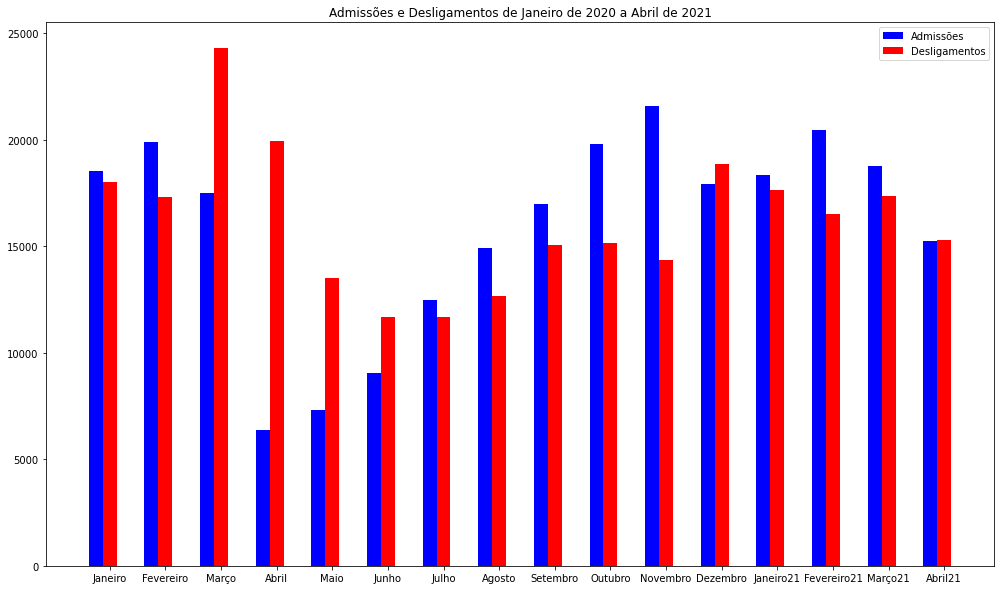

In [7]:
fig, (tx1) = plt.subplots(figsize=(17,10))
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro','Janeiro21','Fevereiro21','Março21','Abril21']

# Cria eixo x para produto A e produto B com uma separação de 0.25 entre as barras
x1 =  np.arange(len(admi))
x2 = [x + 0.25 for x in x1]

# Plota as barras
plt.bar(x1, admi, width=0.25, label = 'Admissões', color = 'blue')
plt.bar(x2, desl, width=0.25, label = 'Desligamentos', color = 'red')

# coloca o nome dos meses como label do eixo x
plt.xticks([x + 0.25 for x in range(len(admi))], meses)

# inseri uma legenda no gráfico
plt.legend()

plt.title("Admissões e Desligamentos de Janeiro de 2020 a Abril de 2021")
plt.show()

In [8]:
admiH=[]
deslH=[]
admiM=[]
deslM=[]
for index in range(len(mesesDF)):
    admiH.append(pesquisaQuant(mesesDF[index],["Admissão","Homem"],["tipomovimentação","sexo"]))
    deslH.append(pesquisaQuant(mesesDF[index],["Desligamento","Homem"],["tipomovimentação","sexo"]))
    admiM.append(pesquisaQuant(mesesDF[index],["Admissão","Mulher"],["tipomovimentação","sexo"]))
    deslM.append(pesquisaQuant(mesesDF[index],["Desligamento","Mulher"],["tipomovimentação","sexo"]))

<h4> Graficos de Admissões e Desligamentos Masculino e Feminino no periodo entre Janeiro de 2020 a Abril de 2021</h4>

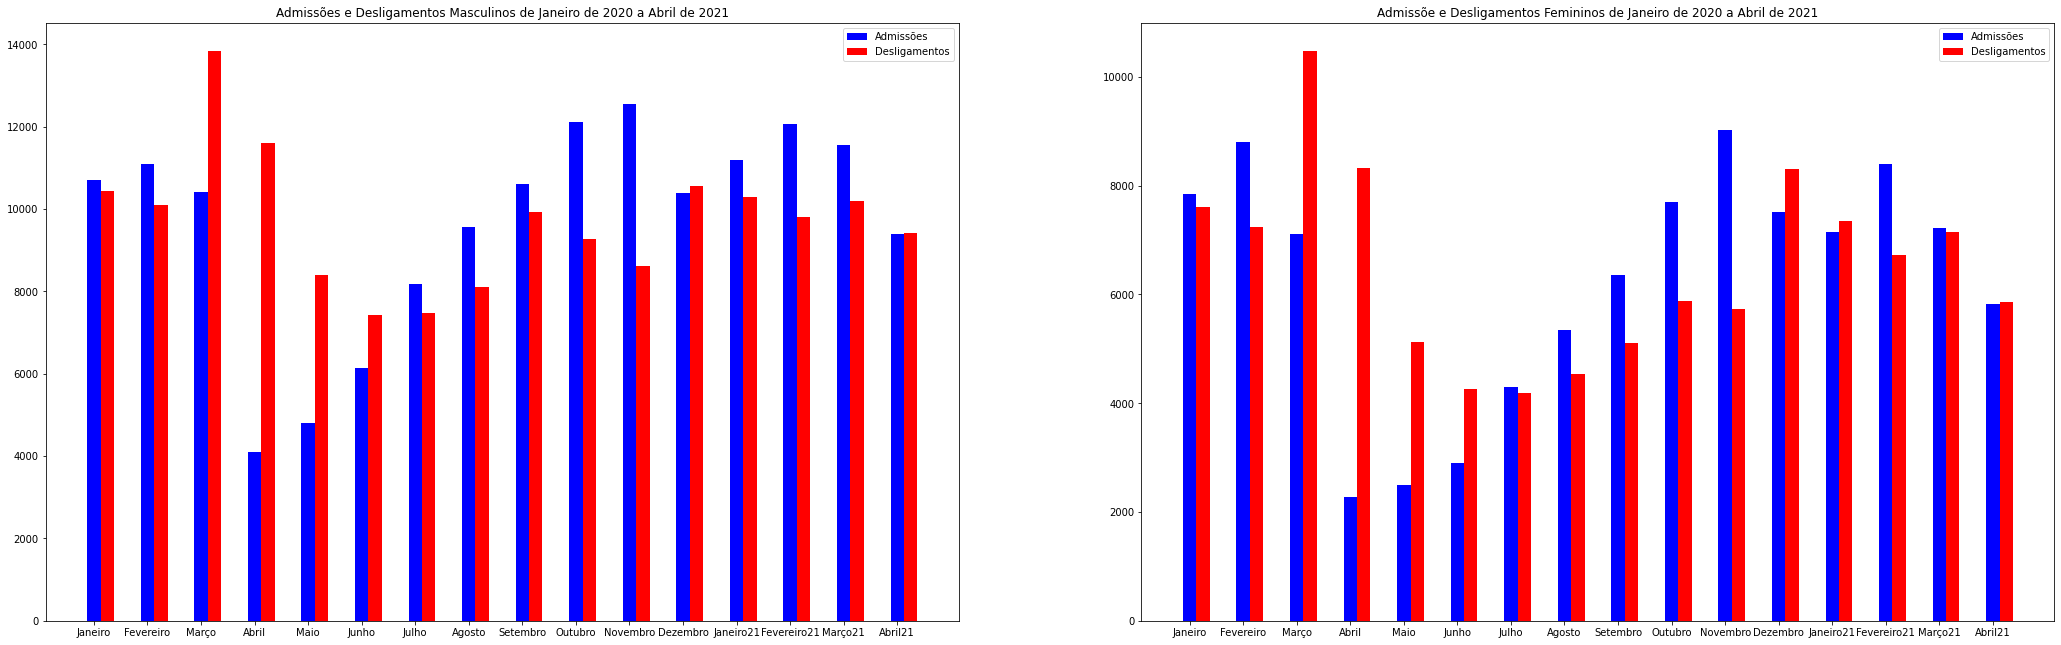

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(36,11))

# Cria eixo x para x1 e x2 com uma separação de 0.25 entre as barras
x1H = np.arange(len(admiH))
x2H = [x + 0.25 for x in x1H]
x1M = np.arange(len(admiM))
x2M = [x + 0.25 for x in x1M]

# Plota as barras
ax1.bar(meses, admiH, width=0.25, label = 'Admissões', color = 'blue')
ax1.bar(x2H, deslH, width=0.25, label = 'Desligamentos', color = 'red')

ax2.bar(meses, admiM, width=0.25, label = 'Admissões', color = 'blue')
ax2.bar(x2M, deslM, width=0.25, label = 'Desligamentos', color = 'red')

# inseri uma legenda no gráfico
ax1.legend()
ax2.legend()

ax1.set(title="Admissões e Desligamentos Masculinos de Janeiro de 2020 a Abril de 2021")
ax2.set(title="Admissõe e Desligamentos Femininos de Janeiro de 2020 a Abril de 2021")
plt.show()

<h4> Classe A (acima de 20 salários mínimos) A => acima de 22000 reais</h4> 
<h4> Classe B (de 10 a 20 salários mínimos) B => de 11000 a 22000 reais</h4>
<h4> Classe C (de 4 a 10 salários mínimos) C => de 4400 a 11000 reais</h4>
<h4> Classe D (de 2 a 4 salários mínimos) D => de 2200 a 4400 reais </h4>
<h4> Classe E (recebe até 2 salários mínimos) E => de 0 a 2200 reais</h4>

In [10]:
classeAadm = []
classeAdem = []
classeBadm = []
classeBdem = []
classeCadm = []
classeCdem = []
classeDadm = [] 
classeDdem = [] 
classeEadm = []
classeEdem = []

for index in range(len(mesesDF)):
    classeAadm.append(pesquisa(mesesDF[index],'salário >= 22000 and tipomovimentação == "Admissão"'))
    classeAdem.append(pesquisa(mesesDF[index],'salário >= 22000 and tipomovimentação == "Desligamento"'))
    classeBadm.append(pesquisa(mesesDF[index],'salário >= 11000 and salário < 22000 and tipomovimentação == "Admissão"'))
    classeBdem.append(pesquisa(mesesDF[index],'salário >= 11000 and salário < 22000 and tipomovimentação == "Desligamento"'))
    classeCadm.append(pesquisa(mesesDF[index],'salário >= 4400 and salário < 11000 and tipomovimentação == "Admissão"'))
    classeCdem.append(pesquisa(mesesDF[index],'salário >= 4400 and salário < 11000 and tipomovimentação == "Desligamento"'))
    classeDadm.append(pesquisa(mesesDF[index],'salário >= 2200 and salário < 4400 and tipomovimentação == "Admissão"'))
    classeDdem.append(pesquisa(mesesDF[index],'salário >= 2200 and salário < 4400 and tipomovimentação == "Desligamento"'))
    classeEadm.append(pesquisa(mesesDF[index],'salário < 2200 and tipomovimentação == "Admissão"'))
    classeEdem.append(pesquisa(mesesDF[index],'salário < 2200 and tipomovimentação == "Desligamento"'))

<h4> Grafico de linha sobre admissão separado por classe social </h4>

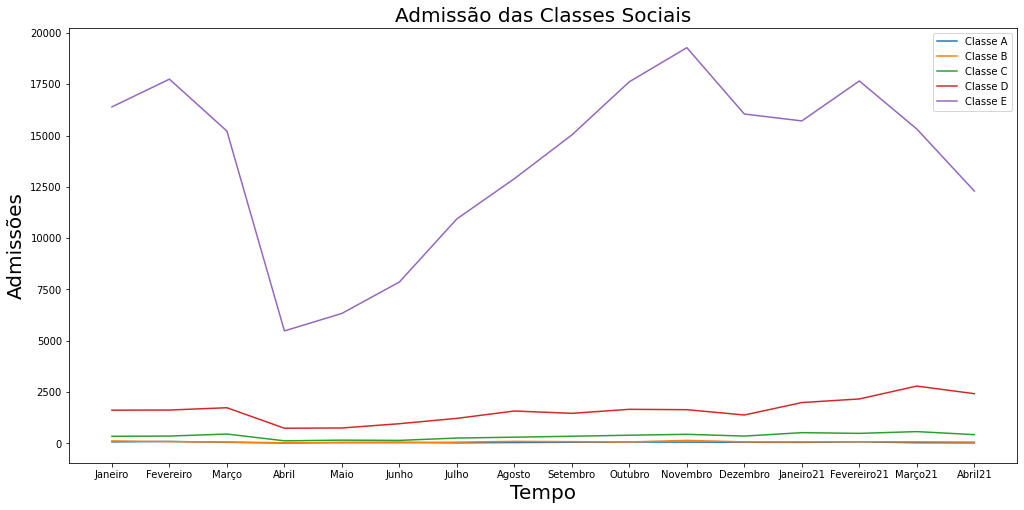

In [11]:
fig, ax = plt.subplots(figsize=(17,8))

x=(meses)
y=(classeAadm)

x2=np.arange(len(meses))
y2=(classeBadm)

y3=(classeCadm)

y4=(classeDadm)

y5=(classeEadm)

plt.plot(x,y,x2,y2,x2,y3,x2,y4,x2,y5)
plt.title("Admissão das Classes Sociais",fontsize=20)
plt.xlabel("Tempo",fontsize=20)
plt.ylabel("Admissões",fontsize=20)

ax.legend(["Classe A", "Classe B", "Classe C", "Classe D", "Classe E"]);
plt.show()

<h4> Grafico de linha sobre desligamentos separado por classe social </h4>

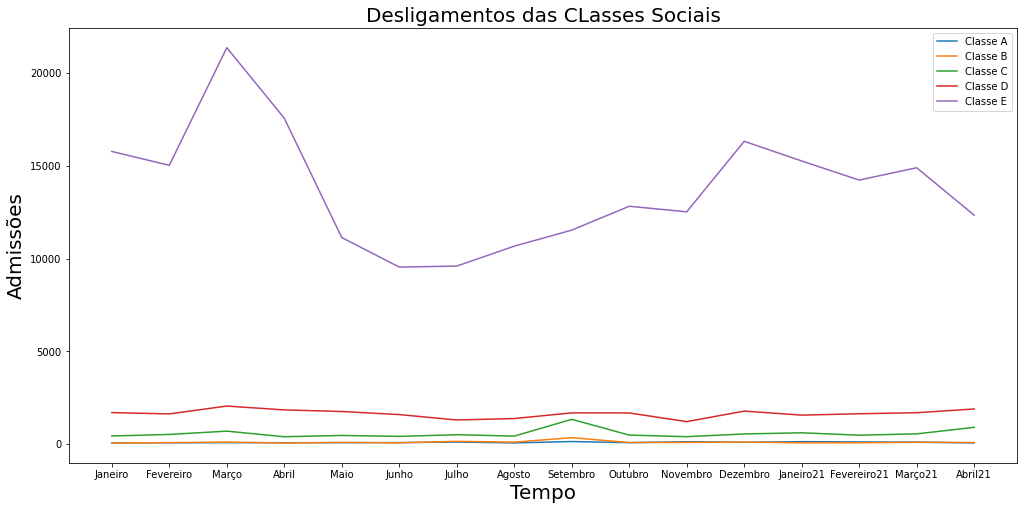

In [12]:
fig, ax = plt.subplots(figsize=(17,8))

x=(meses)
y=(classeAdem)

x2=np.arange(len(meses))
y2=(classeBdem)

y3=(classeCdem)

y4=(classeDdem)

y5=(classeEdem)

plt.plot(x,y,x2,y2,x2,y3,x2,y4,x2,y5)
plt.title("Desligamentos das CLasses Sociais",fontsize=20)
plt.xlabel("Tempo",fontsize=20)
plt.ylabel("Admissões",fontsize=20)

ax.legend(["Classe A", "Classe B", "Classe C", "Classe D", "Classe E"]);
plt.show()

In [13]:
idade19Adm = []
idade19Des = []
idade20Adm = []
idade20Des = []
idade30Adm = []
idade30Des = []
idade40Adm = []
idade40Des = []
idade50Adm = []
idade50Des = []
idade60Adm = []
idade60Des = []

for index in range(len(mesesDF)):
    idade60Adm.append(pesquisa(mesesDF[index],'idade >= 60 and tipomovimentação == "Admissão"'))
    idade60Des.append(pesquisa(mesesDF[index],'idade >= 60 and tipomovimentação == "Desligamento"'))
    idade50Adm.append(pesquisa(mesesDF[index],'idade >= 50 and idade < 60 and tipomovimentação == "Admissão"'))
    idade50Des.append(pesquisa(mesesDF[index],'idade >= 50 and idade < 60 and tipomovimentação == "Desligamento"'))
    idade40Adm.append(pesquisa(mesesDF[index],'idade >= 40 and idade < 50 and tipomovimentação == "Desligamento"'))
    idade40Des.append(pesquisa(mesesDF[index],'idade >= 40 and idade < 50 and tipomovimentação == "Desligamento"'))
    idade30Adm.append(pesquisa(mesesDF[index],'idade >= 30 and idade < 40 and tipomovimentação == "Admissão"'))
    idade30Des.append(pesquisa(mesesDF[index],'idade >= 30 and idade < 40 and tipomovimentação == "Desligamento"'))
    idade20Adm.append(pesquisa(mesesDF[index],'idade >= 19 and idade < 30 and tipomovimentação == "Admissão"'))
    idade20Des.append(pesquisa(mesesDF[index],'idade >= 19 and idade < 30 and tipomovimentação == "Desligamento"'))
    idade19Adm.append(pesquisa(mesesDF[index],'idade < 19 and tipomovimentação == "Admissão"'))
    idade19Des.append(pesquisa(mesesDF[index],'idade < 19 and tipomovimentação == "Desligamento"'))

<h4> Grafico de Area de admissões separado por idades </h4>

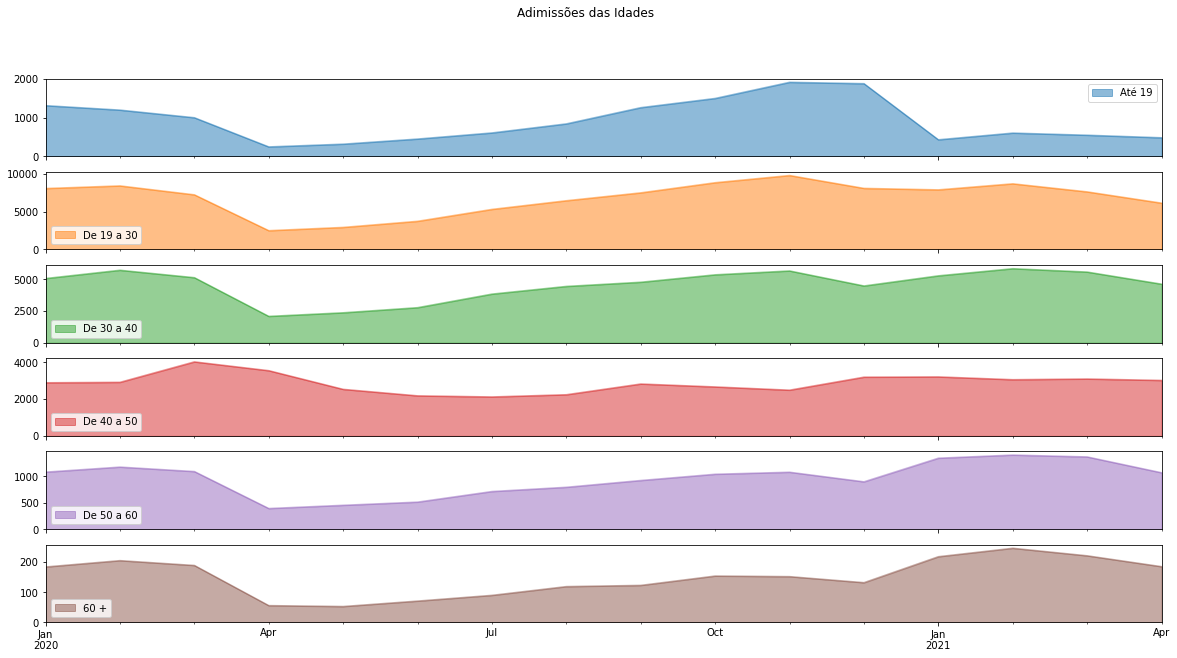

In [14]:
graficoIdade = pd.DataFrame({
    'Até 19': idade19Adm,
    'De 19 a 30': idade20Adm,
    'De 30 a 40': idade30Adm,
    'De 40 a 50': idade40Adm,
    'De 50 a 60': idade50Adm,
    '60 +': idade60Adm,
}, index=pd.date_range(start='2020/01/01', end='2021/05/01', freq='M'))

ax = graficoIdade.plot.area(stacked=False, title =("Adimissões das Idades"),subplots=True,figsize = (20,10))


<h4> Grafico de Area de desligamentos separado por idades </h4>

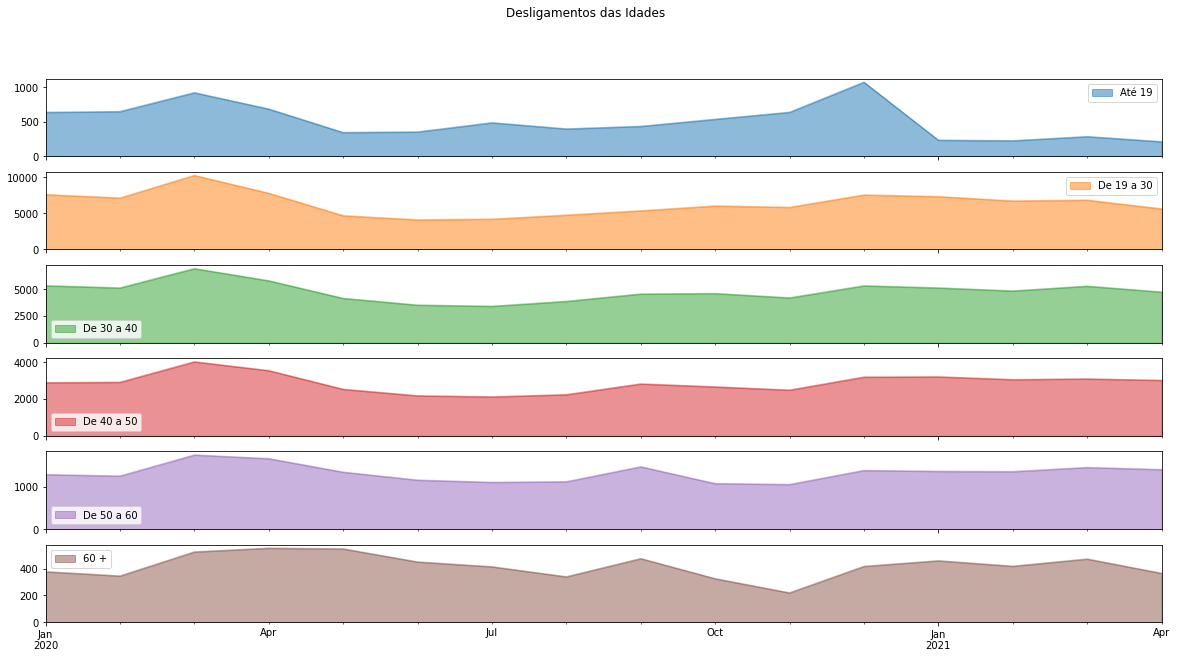

In [15]:
graficoIdade = pd.DataFrame({
    'Até 19': idade19Des,
    'De 19 a 30': idade20Des,
    'De 30 a 40': idade30Des,
    'De 40 a 50': idade40Des,
    'De 50 a 60': idade50Des,
    '60 +': idade60Des,
}, index=pd.date_range(start='2020/01/01', end='2021/05/01', freq='M'))

ax = graficoIdade.plot.area(stacked=False, title =("Desligamentos das Idades"),subplots=True,figsize = (20,10))


In [16]:
AnalfAdm = []
AnalfDes = []
Até5Adm = []
Até5Des = []
FundCompAdm = []
FundCompDes = []
Completo5Amm = []
Completo5Des = []
MIncoAdm = []
MIncoDes = []
MComAdm = []
MComDes = []
SIncoAdm = []
SIncoDes = []
SComAdm = []
SComDes = []
MestradoAdm = []
MestradoDes = []
DoutoradoAdm = []
DoutoradoDes = []
PosComAdm = []
PosComDes = []

for index in range(len(mesesDF)):
    AnalfAdm.append(pesquisaQuant(mesesDF[index],['Analfabeto',"Admissão"],["graudeinstrução","tipomovimentação"]))
    AnalfDes.append(pesquisaQuant(mesesDF[index],['Analfabeto',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    Até5Adm.append(pesquisaQuant(mesesDF[index],['Até 5ª Incompleto',"Admissão"],["graudeinstrução","tipomovimentação"]))
    Até5Des.append(pesquisaQuant(mesesDF[index],['Até 5ª Incompleto',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    Completo5Amm.append(pesquisaQuant(mesesDF[index],['5ª Completo Fundamental',"Admissão"],["graudeinstrução","tipomovimentação"]))
    Completo5Des.append(pesquisaQuant(mesesDF[index],['5ª Completo Fundamental',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    FundCompAdm.append(pesquisaQuant(mesesDF[index],['6ª a 9ª Fundamental',"Admissão"],["graudeinstrução","tipomovimentação"]))
    FundCompDes.append(pesquisaQuant(mesesDF[index],['6ª a 9ª Fundamental',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    MIncoAdm.append(pesquisaQuant(mesesDF[index],['Médio Incompleto',"Admissão"],["graudeinstrução","tipomovimentação"]))
    MIncoDes.append(pesquisaQuant(mesesDF[index],['Médio Incompleto',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    MComAdm.append(pesquisaQuant(mesesDF[index],['Médio Completo',"Admissão"],["graudeinstrução","tipomovimentação"]))
    MComDes.append(pesquisaQuant(mesesDF[index],['Médio Completo',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    SIncoAdm.append(pesquisaQuant(mesesDF[index],['Superior Incompleto',"Admissão"],["graudeinstrução","tipomovimentação"]))
    SIncoDes.append(pesquisaQuant(mesesDF[index],['Superior Incompleto',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    SComAdm.append(pesquisaQuant(mesesDF[index],['Superior Completo',"Admissão"],["graudeinstrução","tipomovimentação"]))
    SComDes.append(pesquisaQuant(mesesDF[index],['Superior Completo',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    MestradoAdm.append(pesquisaQuant(mesesDF[index],['Mestrado',"Admissão"],["graudeinstrução","tipomovimentação"]))
    MestradoDes.append(pesquisaQuant(mesesDF[index],['Mestrado',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    DoutoradoAdm.append(pesquisaQuant(mesesDF[index],['Doutorado',"Admissão"],["graudeinstrução","tipomovimentação"]))
    DoutoradoDes.append(pesquisaQuant(mesesDF[index],['Doutorado',"Desligamento"],["graudeinstrução","tipomovimentação"]))
    PosComAdm.append(pesquisaQuant(mesesDF[index],['Pós-Graduação completa',"Admissão"],["graudeinstrução","tipomovimentação"]))
    PosComDes.append(pesquisaQuant(mesesDF[index],['Pós-Graduação completa',"Desligamento"],["graudeinstrução","tipomovimentação"]))

<h4> Grafico de linha sobre admissões separado por grau de instrução </h4>

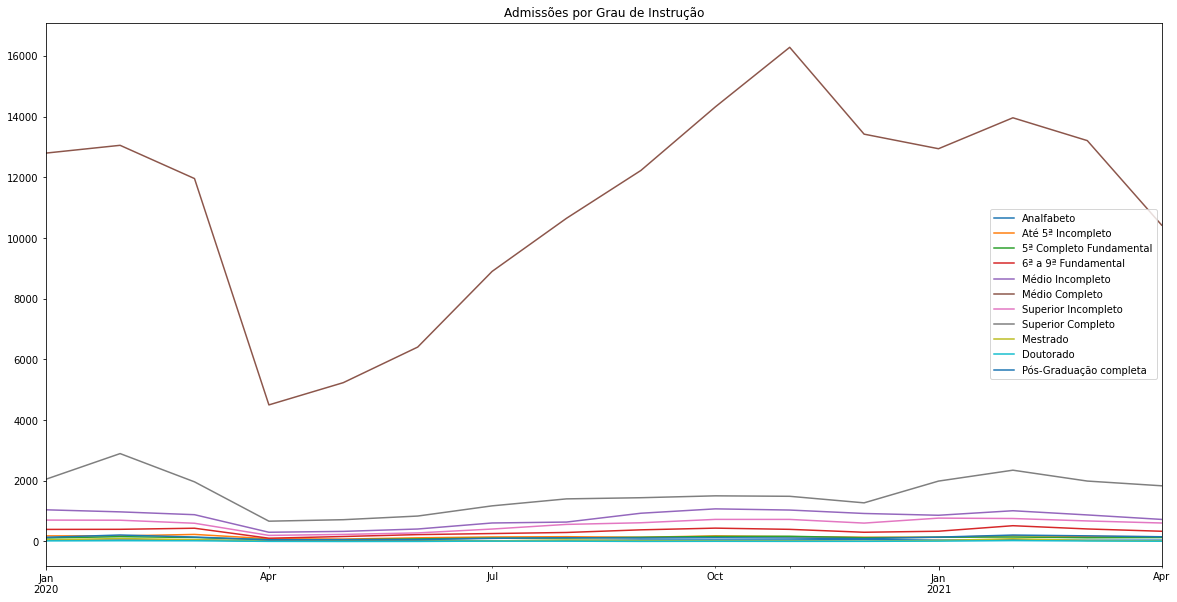

In [22]:
graficoInst = pd.DataFrame({
    'Analfabeto': AnalfAdm,
    'Até 5ª Incompleto': Até5Adm,
    '5ª Completo Fundamental': Completo5Amm,
    '6ª a 9ª Fundamental': FundCompAdm,
    'Médio Incompleto': MIncoAdm,
    'Médio Completo': MComAdm,
    'Superior Incompleto': SIncoAdm,
    'Superior Completo':SComAdm,
    'Mestrado': MestradoAdm,
    'Doutorado': DoutoradoAdm,
    'Pós-Graduação completa': PosComAdm,
}, index=pd.date_range(start='2020/01/01', end='2021/05/01', freq='M'))

ax = graficoInst.plot.line( title =("Admissões por Grau de Instrução"),figsize = (20,10))

<h4> Grafico de linha sobre desligamentos separado por grau de instrução </h4>

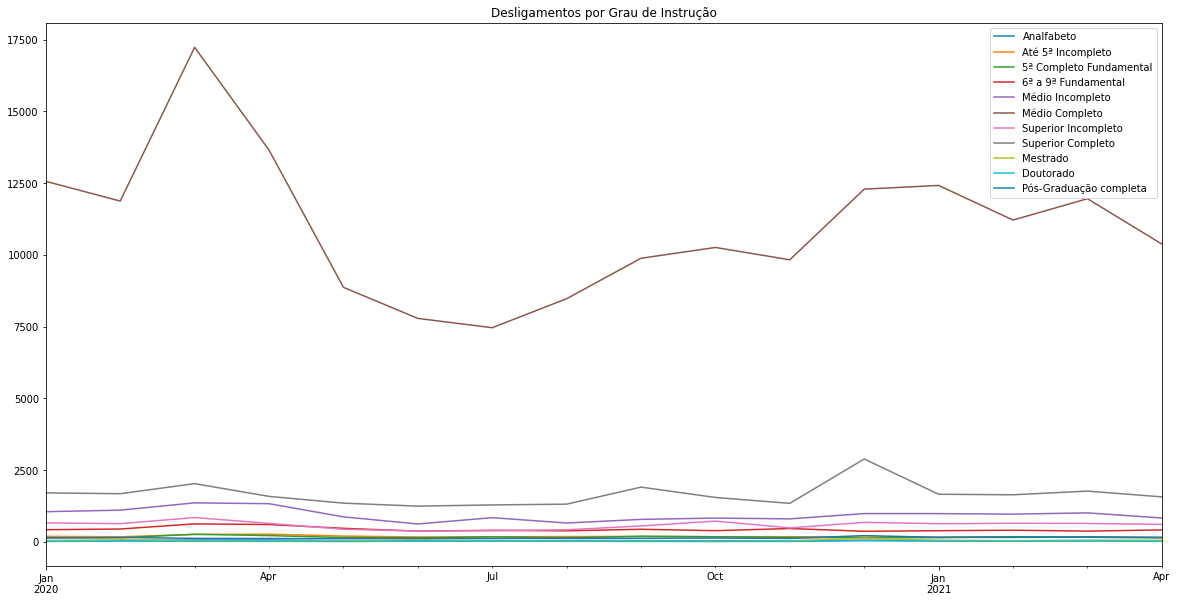

In [23]:
graficoInst = pd.DataFrame({
    'Analfabeto': AnalfDes,
    'Até 5ª Incompleto': Até5Des,
    '5ª Completo Fundamental': Completo5Des,
    '6ª a 9ª Fundamental': FundCompDes,
    'Médio Incompleto': MIncoDes,
    'Médio Completo': MComDes,
    'Superior Incompleto': SIncoDes,
    'Superior Completo':SComDes,
    'Mestrado': MestradoDes,
    'Doutorado': DoutoradoDes,
    'Pós-Graduação completa': PosComDes,
}, index=pd.date_range(start='2020/01/01', end='2021/05/01', freq='M'))

ax = graficoInst.plot.line( title =("Desligamentos por Grau de Instrução"),figsize = (20,10))

In [24]:
admiSetor={}
deslSetor={}
temp1 = jan2020.groupby(["seção","tipomovimentação"])["município"].count()
for att in temp1.keys():
    admiSetor[att[0]]=[]
    deslSetor[att[0]]=[]

for mes in mesesDF:
    agupamento = mes.groupby(["seção","tipomovimentação"])["município"].count()
    for atti in agupamento.keys():
        if(atti[1]=="Admissão"):    
            admiSetor[atti[0]].append(agupamento[atti[0]]["Admissão"])
        if(atti[1]=="Desligamento"):
            deslSetor[atti[0]].append(agupamento[atti[0]]["Desligamento"])
        try:
            if(agupamento[atti[0]]["Admissão"] in locals()):
                pass
        except:
            admiSetor[atti[0]].append(0)
        try:
            if(agupamento[atti[0]]["Desligamento"] in locals()):
                pass
        except:
            deslSetor[atti[0]].append(0)

<h4> Grafico de linha sobre Admissões por Setores </h4>

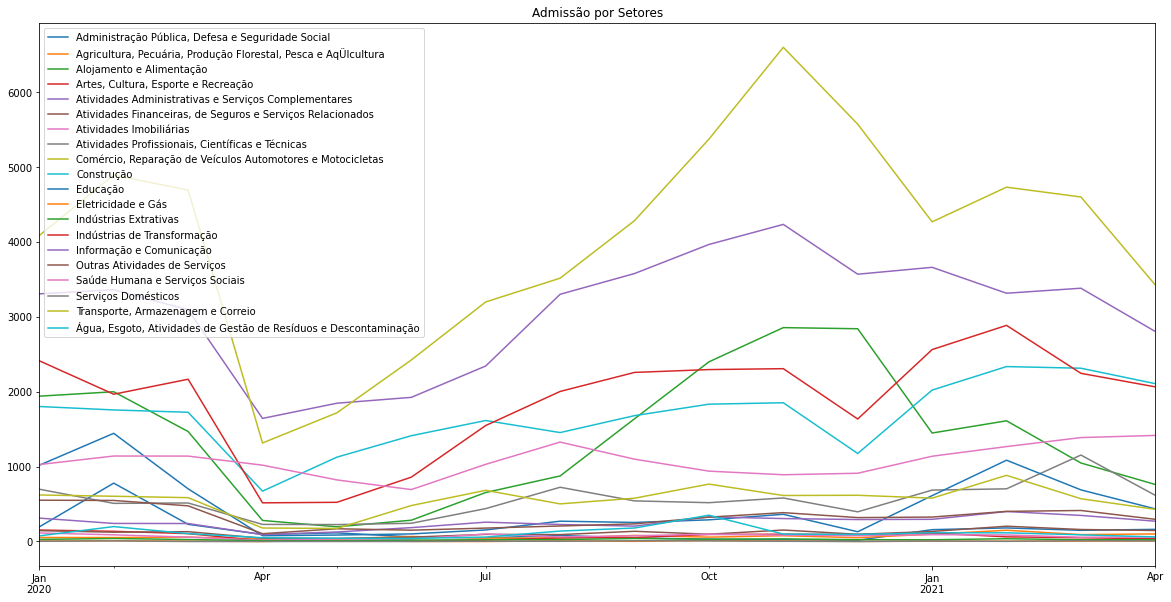

In [31]:
graficoInst = pd.DataFrame(admiSetor, index=pd.date_range(start='2020/01/01', end='2021/05/01', freq='M'))

ax = graficoInst.plot.line( title =("Admissão por Setores"),figsize = (20,10))

<h4> Grafico de linha sobre Desligamentos por Setores </h4>

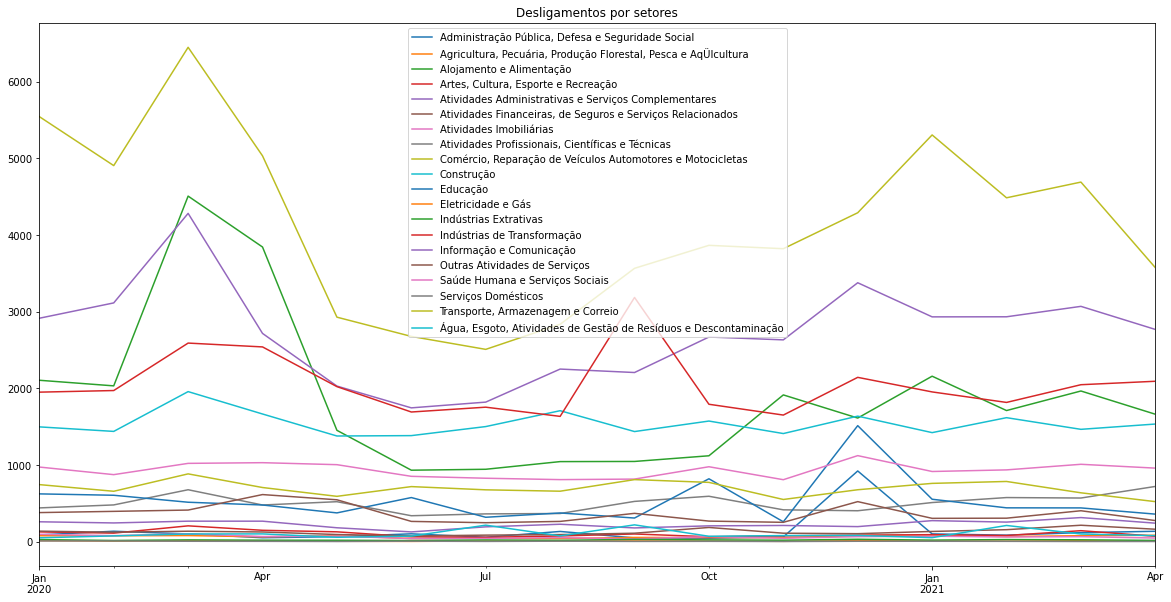

In [30]:
graficoInst = pd.DataFrame(deslSetor, index=pd.date_range(start='2020/01/01', end='2021/05/01', freq='M'))

ax = graficoInst.plot.line( title =("Desligamentos por setores"),figsize = (20,10))